In [1]:
import pandas as pd
pd.set_option('display.max_columns', 25)
arquivo = pd.read_csv('/home/stain/Documents/MachineLearning/Datasets/titanic/train.csv')
arquivo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
arquivo.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
faltantes = arquivo.isnull().sum()
print((faltantes / len(arquivo)) * 100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [4]:
arquivo.drop(['Cabin', 'Name', 'Fare', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

In [5]:
faltantes = arquivo.isnull().sum()
print((faltantes / len(arquivo)) * 100)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Embarked     0.224467
dtype: float64


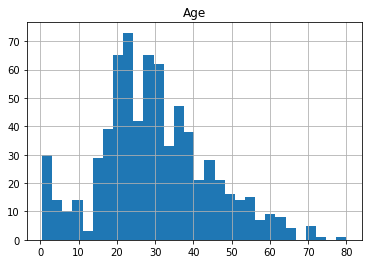

In [6]:
import matplotlib.pyplot as plt 
arquivo.hist(column=['Age'], bins = 30)
plt.show()

In [7]:
arquivo['Age'].fillna(arquivo['Age'].median(), inplace=True)
arquivo.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [8]:
sex_encode = pd.get_dummies(arquivo['Sex'])
emb_encode = pd.get_dummies(arquivo['Embarked'])
concatenado = pd.concat([arquivo, sex_encode, emb_encode], axis = 1)
concatenado.drop('Sex', axis = 1, inplace = True)
concatenado.drop('Embarked', axis = 1, inplace = True)
concatenado.head()

,Survived,Pclass,Age,SibSp,Parch,female,male,C,Q,S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [9]:
x = concatenado.drop('Survived', axis = 1)
y = concatenado['Survived']

In [16]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

learning_rate = np.array([0.01, 0.02, 0.2, 0.5, 0.9])
valores_grid = {'learning_rate': learning_rate}

modelo = GradientBoostingClassifier(n_estimators = 350)

grid = GridSearchCV(estimator = modelo, param_grid = valores_grid, cv = 5, n_jobs = -1)
grid.fit(x, y)

print('Split:', grid.best_estimator_.min_samples_split)
print('Rate:', grid.best_estimator_.learning_rate)
print('Profundidade:', grid.best_estimator_.max_depth)
print('Leaf:', grid.best_estimator_.min_samples_leaf)
print('Acurácia:', grid.best_score_)

Split: 2
Rate: 0.01
Profundidade: 3
Leaf: 1
Acurácia: 0.8260247316552632
